# **Project: Customer Lifetime Value Prediction**

# Project description:

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

# Business Problem

An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.


# Importing important Libraries

In [1]:
# importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

In [2]:
# loading the data

df = pd.read_csv('/content/AutoInsurance.csv')

df.head(4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [3]:
# check the shape of the data

df.shape

(9134, 24)

We have 24 columns in the data with 9134 records.

# Checking the Null Values

In [4]:
# check the null values

df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

We have no null values in the data.

In [5]:
# check the data types and the columns names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

As we have seen there are different data types and our target variable is the 'Customer Lifetime Value'. Rest all the data are the features responsible for the target variable. Therefore, we will first change the name of targert variable to 'CLV'.

In [6]:
df.rename(columns = {'Customer Lifetime Value':'CLV'}, inplace = True)

df.head(2)



,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Now we will create two sets of features i.e., numerical columns and categorical columns.
numerical columns will hold all the float and int data.
categorical columns will hold all the object type data.

In [8]:
numerical_col = df.select_dtypes(include=['int64', 'float64'])
numerical_col.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [9]:
numerical_col = numerical_col.drop(['Number of Open Complaints','Number of Policies'], axis = 1)

we are here dropping two columns named ('Numbe of Open Complaints', 'Number of Policies'), because they irrelevant to our numerical columns.
They contain categorical values.


# Statistical Information of Numerical Values

In [10]:
numerical_col.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


Here, we can see that our target variable is in a contiuous form and doesn't hold any discreet format.

# EDA

**Numerical Variable**

<ipython-input-11-fa82d13ed2c4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CLV'])


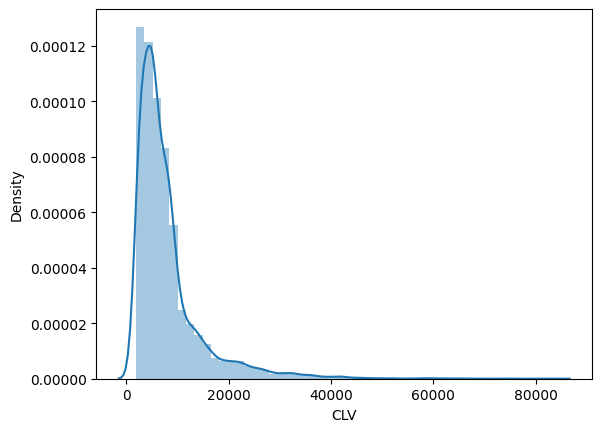

In [11]:
# Let's first see the distribution of the CLV
sns.distplot(df['CLV'])

plt.show()


Here, our target variable 'CLV' can be seen as it's not normally distributed and highly skewed.

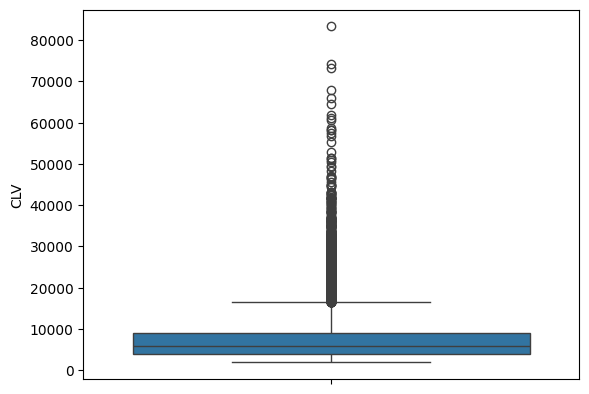

In [12]:
# let's see the outliers
sns.boxplot(df['CLV'])

plt.show()

we can see that there are a lot of outliers in the data, but we can't directly treat them as they can be extreme cases.

Now we will check one numerical column for their distrubution and there dependency over the target variable.

# Income

<ipython-input-13-4eaeed176e0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_col['Income'])


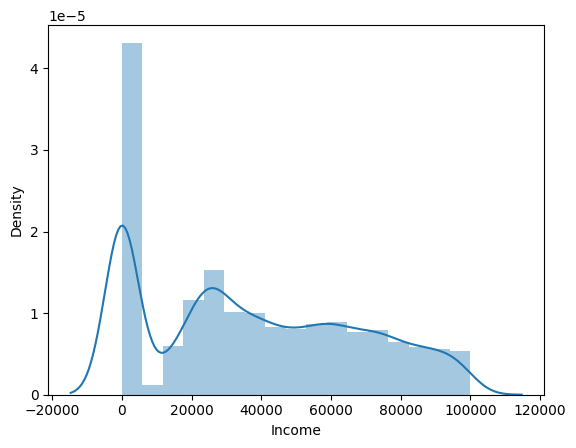

In [13]:
sns.distplot(numerical_col['Income'])
plt.show()

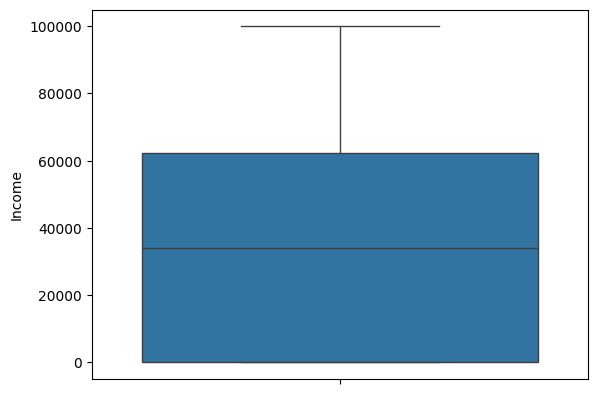

In [14]:
sns.boxplot(numerical_col['Income'])
plt.show()

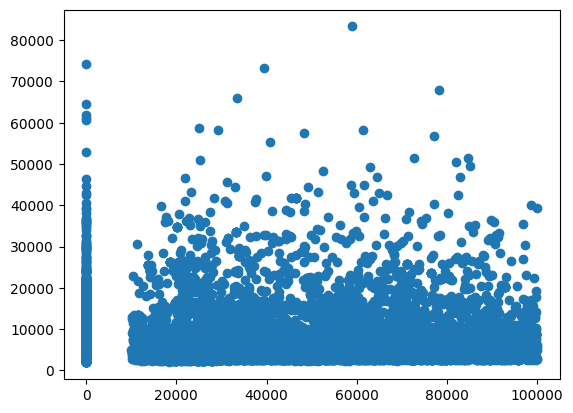

In [15]:
plt.scatter(df['Income'], df['CLV'])
plt.show()

There is no visible relationship between the Income and CLV

# Monthly Premium Auto

<ipython-input-16-f2df586acf0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly Premium Auto'])


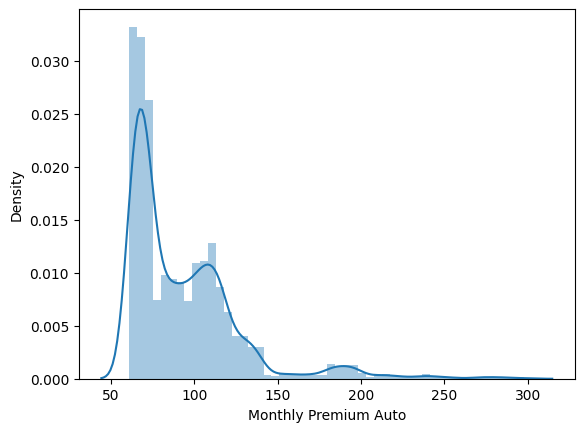

In [16]:
sns.distplot(df['Monthly Premium Auto'])
plt.show()

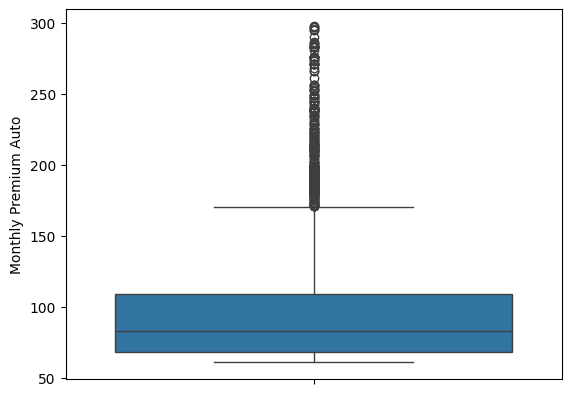

In [17]:
sns.boxplot(df['Monthly Premium Auto'])
plt.show()

From distribution plot and box plot we can see that there are several outliers in the data.

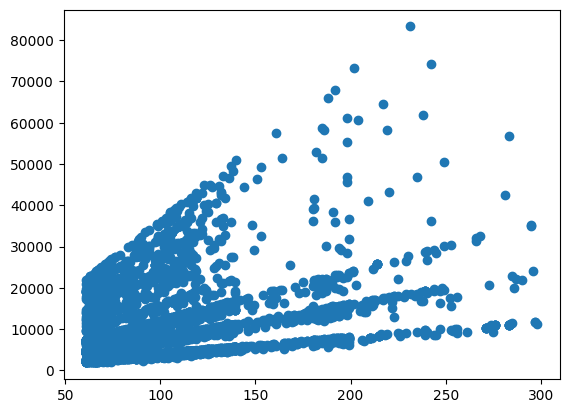

In [18]:
plt.scatter(df['Monthly Premium Auto'], df['CLV'])
plt.show()

Here, we can see there is a certain linear relation between the Monthly Premium Auto and CLV. As the Monthly Premium Auto is increasing it can be seen as CLV is also increasing.

# Months Since Last Claim

<ipython-input-19-b27c949b6b9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Last Claim'])


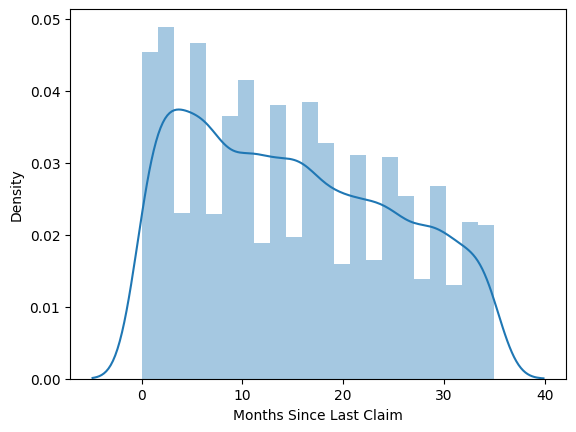

In [19]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

It is normally distributed.

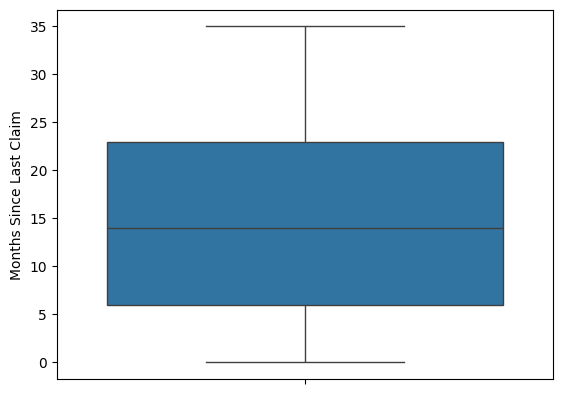

In [20]:
sns.boxplot(df['Months Since Last Claim'])
plt.show()

There is no outliers seen.

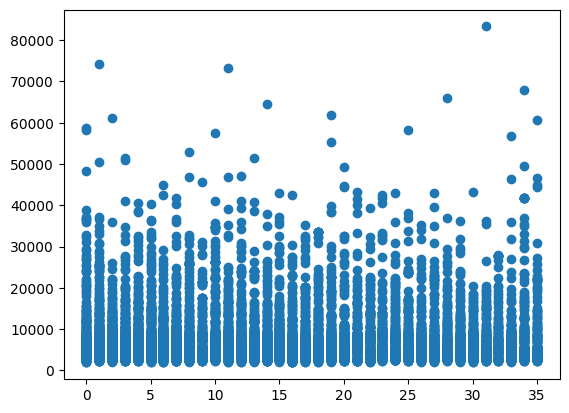

In [21]:
plt.scatter(df['Months Since Last Claim'], df['CLV'])
plt.show()

There is no relation between the Months Since Last Claim and CLV.

# Months Since Policy Inception

<ipython-input-22-4095dae5d782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Policy Inception'])


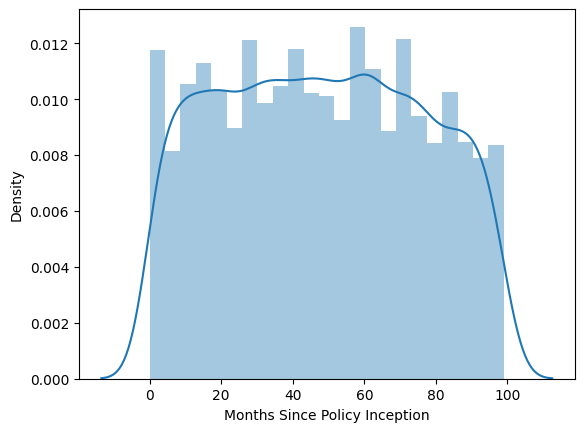

In [22]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

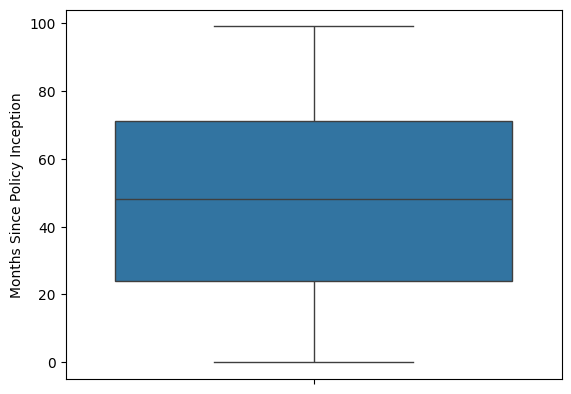

In [23]:
sns.boxplot(df['Months Since Policy Inception'])
plt.show()

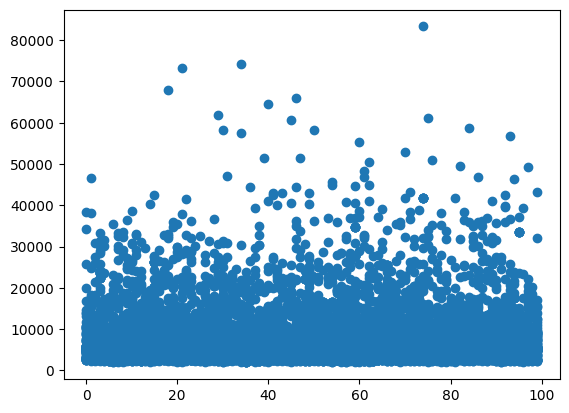

In [24]:
plt.scatter(df['Months Since Policy Inception'], df['CLV'])
plt.show()

There is no relationship.

# Total Claim Amount

<ipython-input-25-e78db172f4f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Claim Amount'])


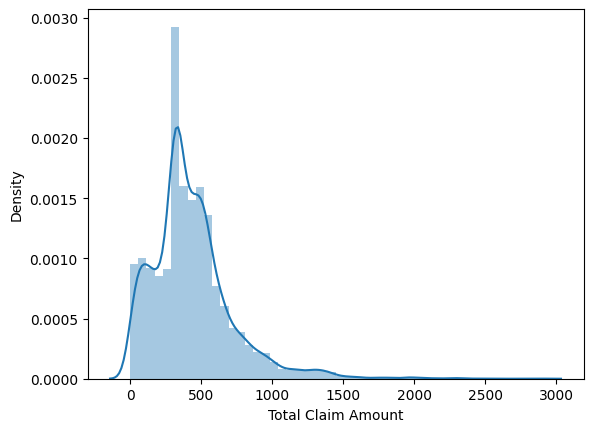

In [25]:
sns.distplot(df['Total Claim Amount'])
plt.show()

Here, it can be seen as the data is not normally dustributed and it is highly skewed.

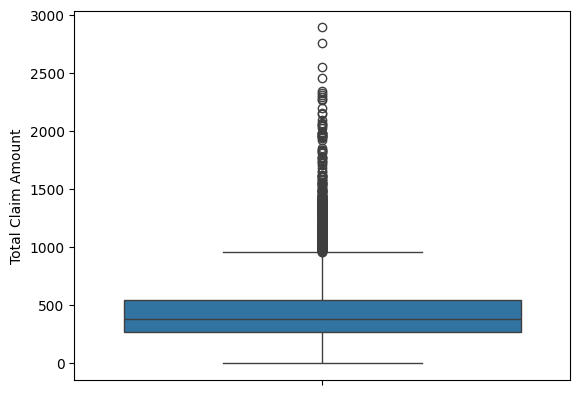

In [26]:
sns.boxplot(df['Total Claim Amount'])
plt.show()

This boxplot can show us that, there are a lot of outliers in the data.

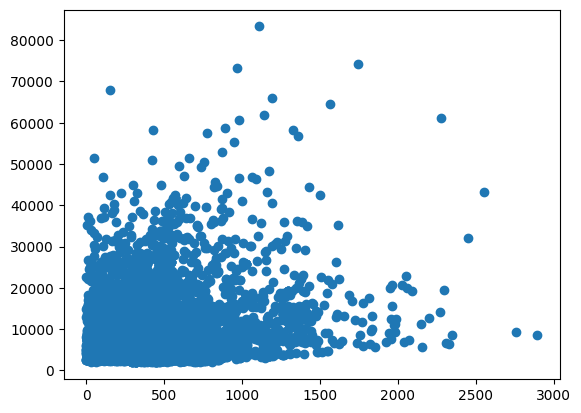

In [27]:
plt.scatter(df['Total Claim Amount'], df['CLV'])
plt.show()

Therefore, by the above univariate plottings and also by this scatter plot we can come to the conclusion that there is a linear relationship between the Total Claim Amount and CLV.

**Categorical Variables**

In [28]:
cat_cols = df.select_dtypes(include = ("object"))

In [29]:
new_cols = df[['Number of Open Complaints','Number of Policies']]

In [30]:
cat_cols = pd.concat([cat_cols, new_cols], axis = 1)

In [31]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [32]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Customer                   9134 non-null   object
 1   State                      9134 non-null   object
 2   Response                   9134 non-null   object
 3   Coverage                   9134 non-null   object
 4   Education                  9134 non-null   object
 5   Effective To Date          9134 non-null   object
 6   EmploymentStatus           9134 non-null   object
 7   Gender                     9134 non-null   object
 8   Location Code              9134 non-null   object
 9   Marital Status             9134 non-null   object
 10  Policy Type                9134 non-null   object
 11  Policy                     9134 non-null   object
 12  Renew Offer Type           9134 non-null   object
 13  Sales Channel              9134 non-null   object
 14  Vehicle 

So, in the categorical columns we have one column names 'Effective to Date'. This column is in object data type but this was supposed too be in date-time data type. Therefore, we are letting go this column as we can not use this column for  analysis.

In [33]:
cat_cols.drop('Effective To Date', axis = 1, inplace= True)

In [34]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

Now we will see the unique values and their count for all the categorical variables.

In [35]:
for i in cat_cols:
  print('The number of unique values in', str(i), 'is', df[i].nunique())
  print(df[i].value_counts())
  print('-------------------------------------')

The number of unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-------------------------------------
The number of unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-------------------------------------
The number of unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-------------------------------------
The number of unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-------------------------------------
The number of unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-------

# State

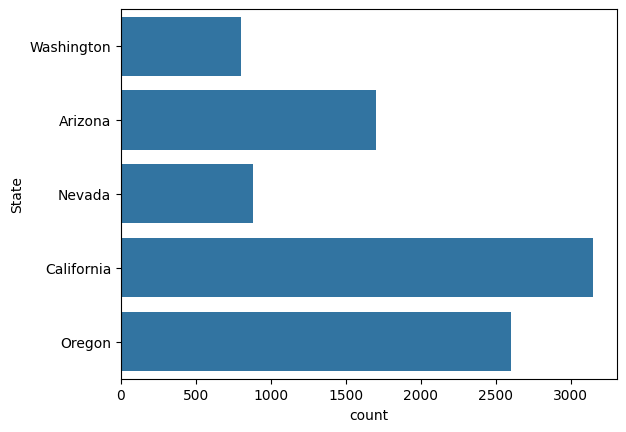

In [36]:
sns.countplot(df['State'])
plt.show()

Most of the customers are residing in California.

# Response

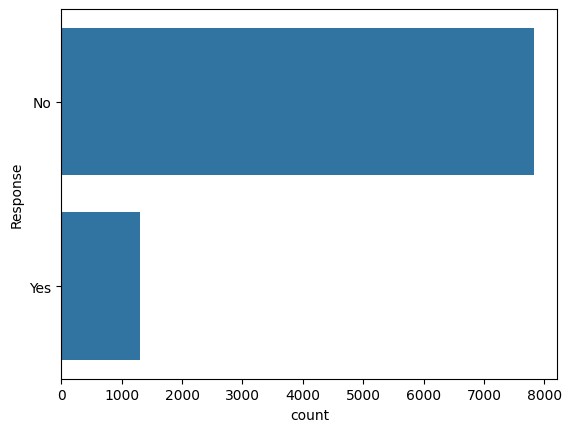

In [37]:
sns.countplot(df['Response'])
plt.show()

Most of the response is 'No' for marketing calls.

# Coverage

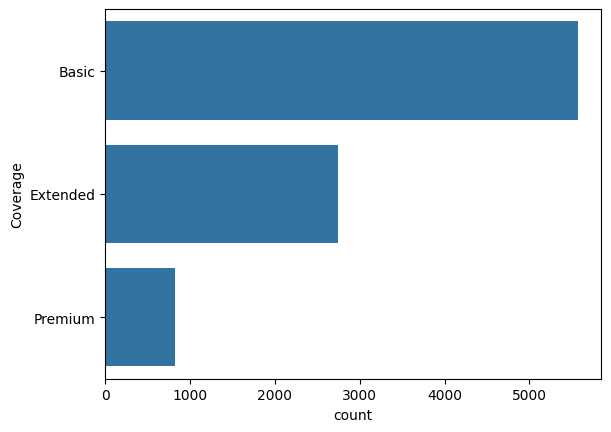

In [38]:
sns.countplot(df['Coverage'])
plt.show()

Most of the customers are going with basic coverage.

# Education

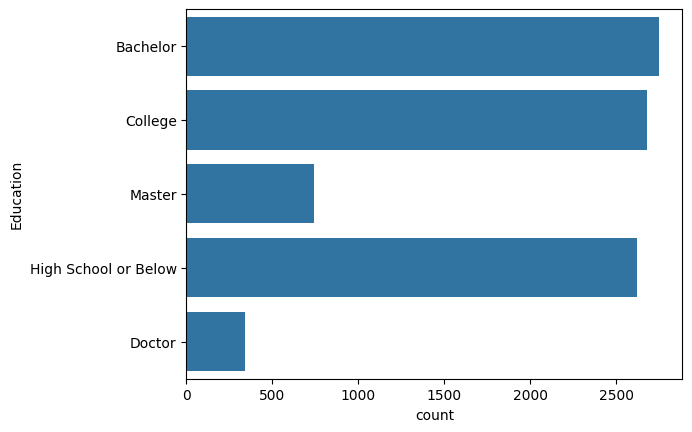

In [39]:
sns.countplot(df['Education'])
plt.show()

Most of the customers have either bachelors or college degree.

# Employment Status

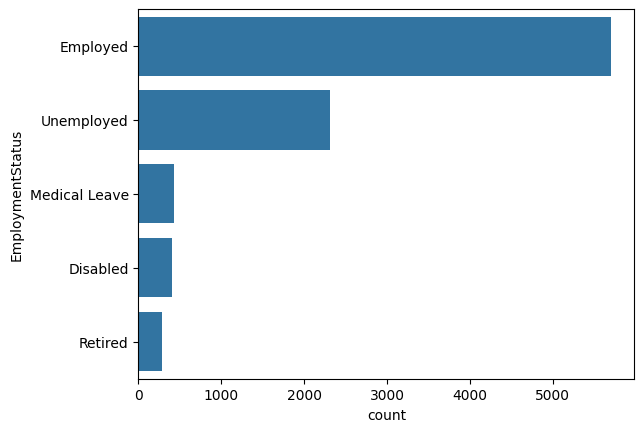

In [40]:
sns.countplot(df['EmploymentStatus'])
plt.show()

Most of the people are employed.

In [41]:
df['EmploymentStatus'].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of customers are employed.

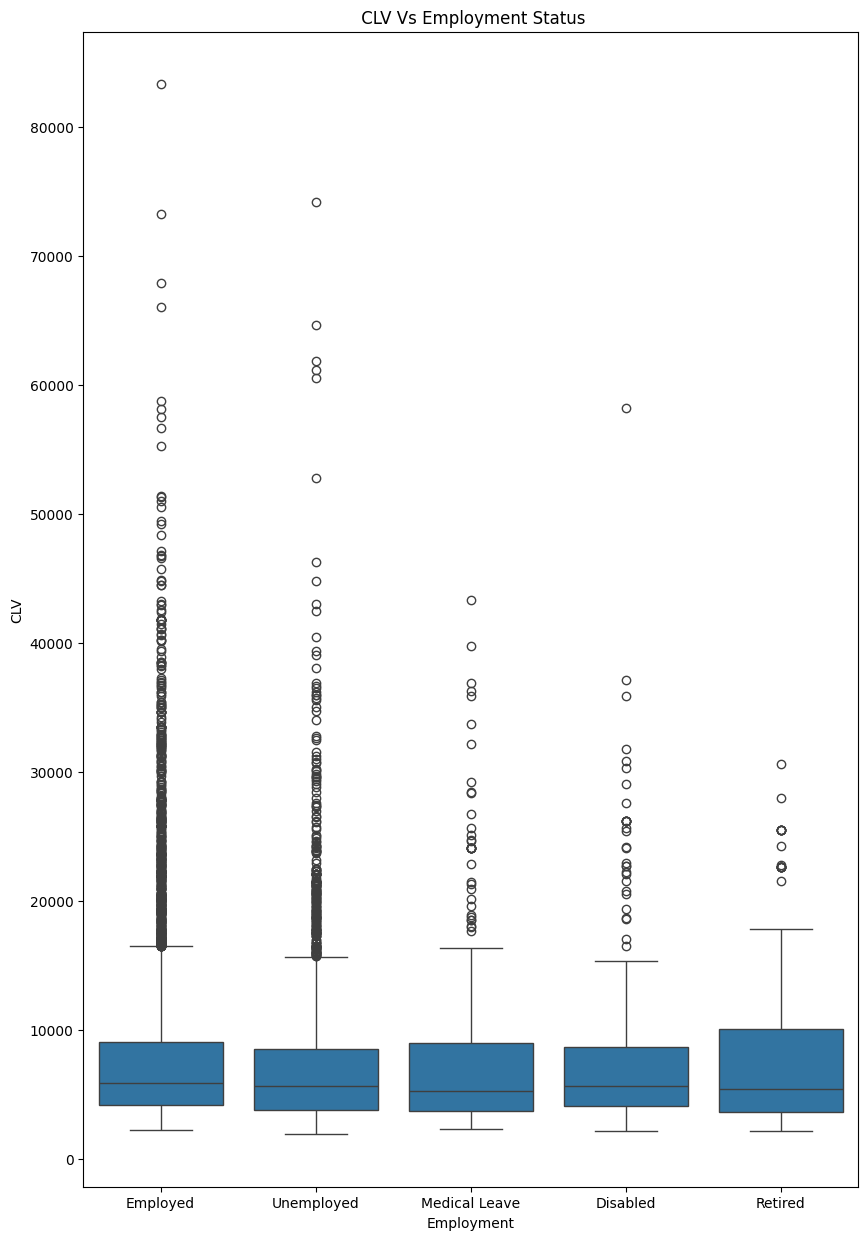

In [42]:
plt.figure(figsize=(10,15))
sns.boxplot(x = df['EmploymentStatus'], y=df['CLV'])
plt.title(' CLV Vs Employment Status')
plt.xlabel('Employment')
plt.ylabel('CLV')

plt.show()

# Gender

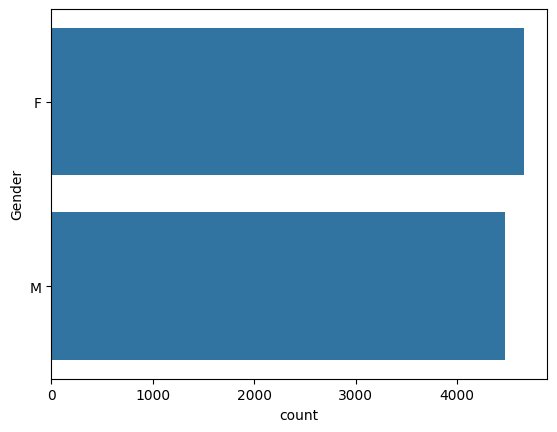

In [43]:
sns.countplot(df['Gender'])
plt.show()

Most customers are female.

# Location Code

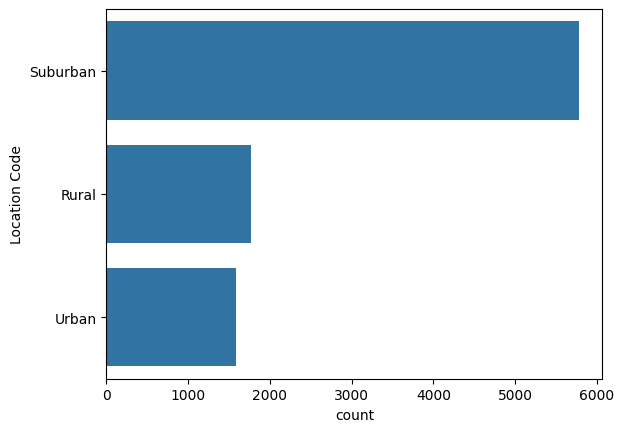

In [44]:
sns.countplot(df['Location Code'])
plt.show()

Most of the people come from the suburbans area of the country.


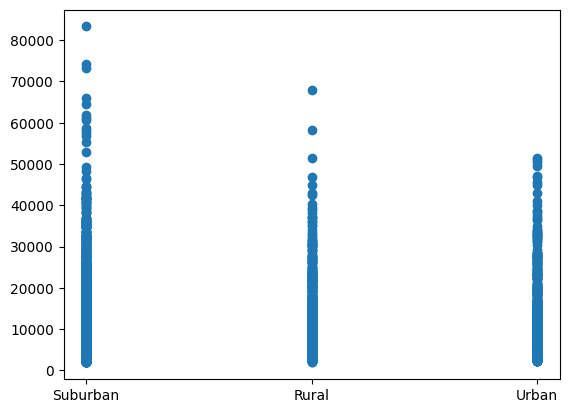

In [45]:
plt.scatter(df['Location Code'], df['CLV'])
plt.show()

# Marital Status

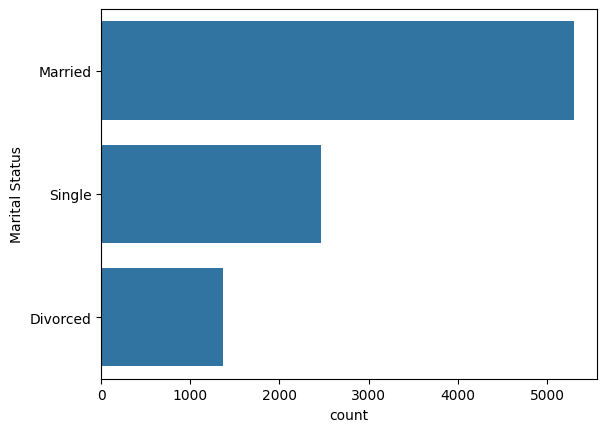

In [46]:
sns.countplot(df['Marital Status'])
plt.show()

Most of the customers are married.

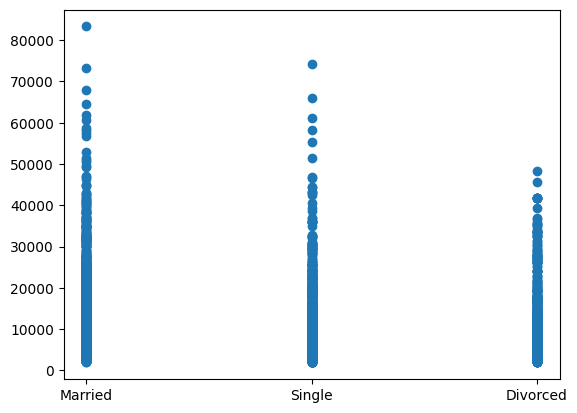

In [47]:
plt.scatter(df['Marital Status'], df['CLV'])
plt.show()

# Policy Type

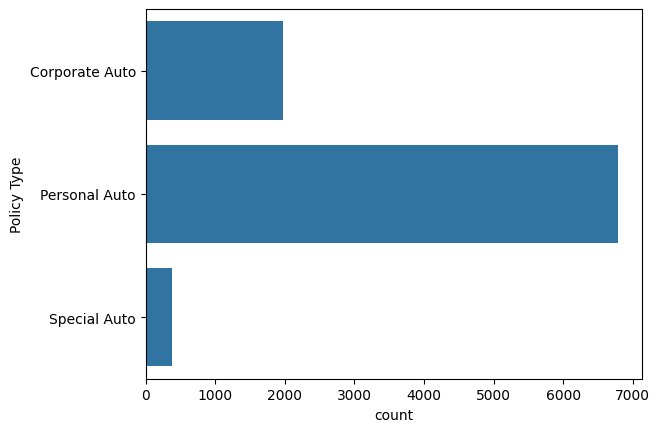

In [48]:
sns.countplot(df['Policy Type'])
plt.show()

Most of the customers holds 'personal auto' type policy.

# Policy

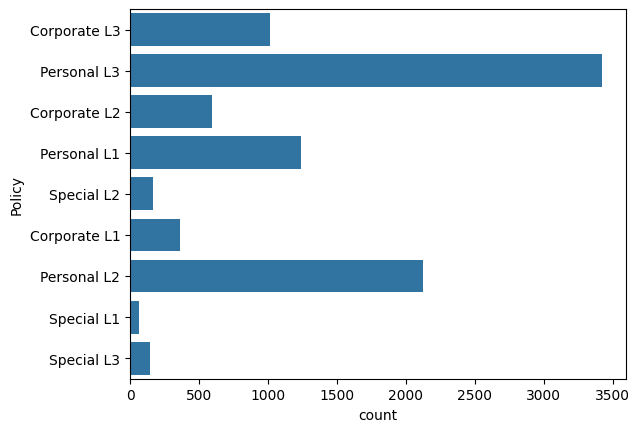

In [49]:
sns.countplot(df['Policy'])
plt.show()

The most ploicy buied is the 'Personal L3' policy.

# Renew Offer Type

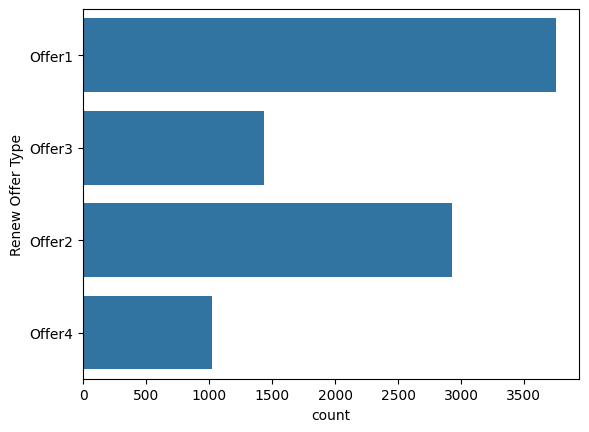

In [50]:
sns.countplot(df['Renew Offer Type'])
plt.show()

# Sales Channel

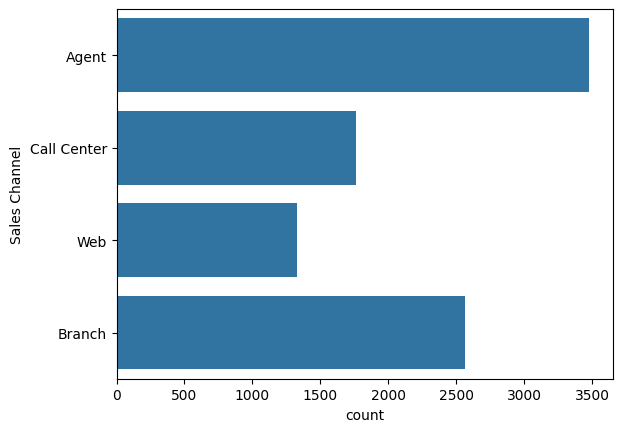

In [51]:
sns.countplot(df['Sales Channel'])
plt.show()

The biggest sales channel are from agents.

# Vehicle Class

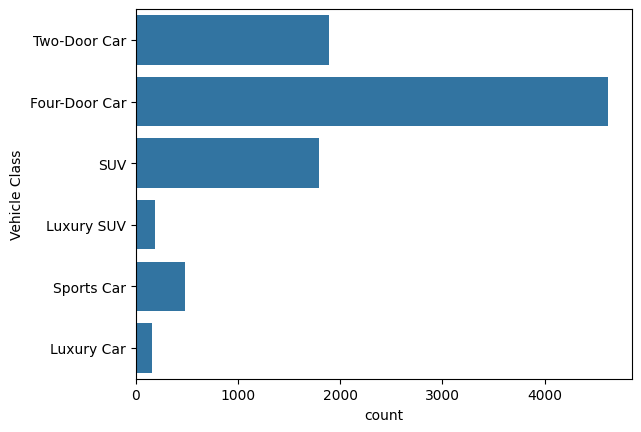

In [52]:
sns.countplot(df['Vehicle Class'])
plt.show()

In [53]:
df['Vehicle Class'].value_counts(normalize=True)*100

Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: Vehicle Class, dtype: float64

Around 50.59% of the customers oown 4-doors cars.

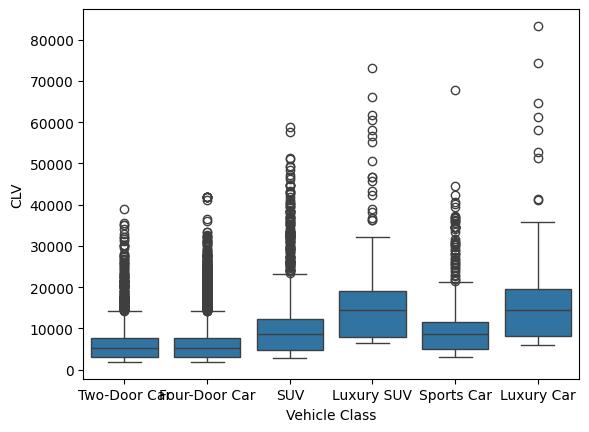

In [54]:
sns.boxplot(x= df['Vehicle Class'], y= df['CLV'])
plt.show()

# Vehicle Size

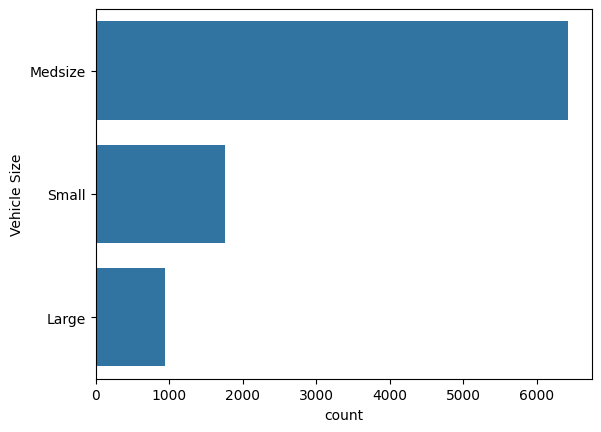

In [55]:
sns.countplot(df['Vehicle Size'])
plt.show()

Most of the customers own mid size vehicle.

# Months

In [56]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], infer_datetime_format=True)

In [57]:
df['Months']=df['Effective To Date'].dt.month

In [58]:
df['Months']= df['Months'].astype('object')

In [59]:
df.head(2)

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1


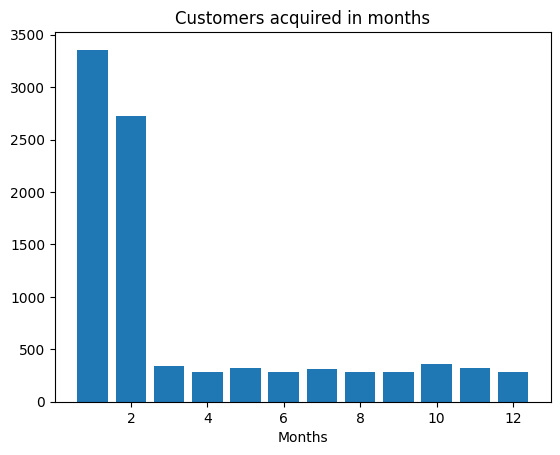

In [60]:
month_count = df['Months'].value_counts()

months_count = month_count.sort_index()

plt.bar(month_count.index, month_count.values)

plt.xlabel('Months')
plt.title('Customers acquired in months')

plt.show()

Most number of customers are acquired in starting of the year.

# Heat Map

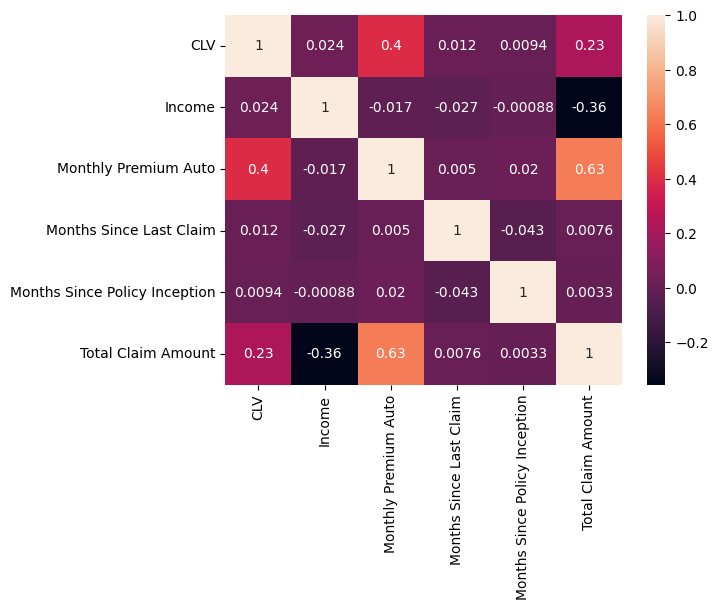

In [61]:
sns.heatmap(numerical_col.corr(), annot = True)
plt.show()

In the heatmap we can clearly see that 'Monthly Premium Auto' has a best correlation with the 'CLV'.
The 'Total Claim amount' also shares a good exceptional correlational.

#Statistical analysis

H0 = The null hypothesis. This shows that the data is normally distributed.


HA = This shows that the data is not normally distributed.

In [62]:
stats.shapiro(df['CLV'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

Here the p-value is less than 0.05. Therefore, we will reject the null hypothesis.

But, now, we will continue with the non-parametric tests as the data of the dependent variables  is not normally distributed.

In [63]:
cat_columns = list(cat_cols)

print(cat_columns)

['Customer', 'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']


In [64]:
T_test = []
annova_test = []

for i in cat_columns:

  if(df[i].nunique()>2):
    annova_test.append(i)

  else:
    T_test.append(i)

print("Anova", annova_test)
print("TTest", T_test)

Anova ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest ['Response', 'Gender']


#Data Preprocessing

In [65]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


As we cannot give the categorical variables directly to the machine. Therefore we will have to convert them into feedable format.

In [66]:
categorical = pd.get_dummies(cat_cols, drop_first =True)

In [67]:
categorical.head()

,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now calling the numerical variables.

In [68]:
numerical_col.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


Now we will concat both the variables table.

In [69]:
df_new = pd.concat([numerical_col, categorical], axis = 1)

df_new.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#Model Building

Splitting the data

In [70]:
df_new.rename(columns = {'CLV':'CLV'}, inplace = True)

In [71]:
x = df_new.drop(['CLV'], axis = 1)

y = df_new['CLV']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)


In [72]:
numerical_col.rename(columns = {'CLV':'CLV'}, inplace = True)

In [73]:
print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(6393, 9175)
(6393,)
(2741, 9175)
(2741,)


# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

log = LinearRegression()

model = log.fit(x_train, y_train)

print("R^2 Score for the train", {log.score(x_train, y_train)})
print("R^2 Score for the test", {log.score(x_test, y_test)})


R^2 Score for the train {1.0}
R^2 Score for the test {0.25821288149529353}


In [75]:
y_pred = model.predict(x_test)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



Now, we will print the scores for linear regression model

In [77]:
print('RSME', np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE", mean_absolute_error(y_test, y_pred))

print('R-squared', r2_score(y_test, y_pred))

RSME 0.5759241670417696
MAE 0.4431274950035798
R-squared 0.25821288149529353


#Lasso Regression

In [78]:
from sklearn.linear_model import Lasso

la = Lasso(random_state = 1)

model = la.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R^2 score for train:', {la.score(x_train, y_train)})
print("R^2 score for test:", {la.score(x_test, y_test)})

R^2 score for train: {0.1950367516366417}
R^2 score for test: {0.19679167777854611}


In [79]:
print('RSME', np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE", mean_absolute_error(y_test, y_pred))

print('R-squared', r2_score(y_test, y_pred))

RSME 0.5992937645386806
MAE 0.4655094075601625
R-squared 0.19679167777854611


#Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('RSME', np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE", mean_absolute_error(y_test, y_pred))

print('R-squared', r2_score(y_test, y_pred))

RSME 0.2595442032931712
MAE 0.1003477588317486
R-squared 0.8493492323378292


#Support Vector Regression

In [82]:
from sklearn.svm import SVR

In [83]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('RSME', np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE", mean_absolute_error(y_test, y_pred))

print('R-squared', r2_score(y_test, y_pred))


RSME 0.6585509926381629
MAE 0.5199065412575749
R-squared 0.03009879475354238


# Random Forest


In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(random_state=1)

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print('RSME', np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE", mean_absolute_error(y_test, y_pred))

print('R-squared', r2_score(y_test, y_pred))

RSME 0.20711664133623567
MAE 0.08812892580039662
R-squared 0.9040646484646621


Till now we have received best performance from Random forest model with best score in RSME and R^2. But, now we will provide apply hyperparameter tuning in this model to score better results.

In [86]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()

# params = {
#     'max_depth': [10, 20, 30],
#     'n_estimators': [100, 200, 50],
#     'bootstrap': [True, False],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, return_train_score=True)

# grid.fit(x, y)
# grid.best_params_


In [87]:
# rf = RandomForestRegressor(**grid.best_params_)

# rf.fit(x_train, y_train)

# y_pred=rf.predict(x_test)

# print('RSME:', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('MAE:', mean_absolute_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))

In [88]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(RandomForestRegressor(max_depth=5), n_estimators=150)

adaboost.fit(x_train, y_train)

y_pred = adaboost.predict(x_test)

print('RSME:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test,y_pred))

RSME: 0.2173383734167086
MAE: 0.12952193474555526
R-squared: 0.8943616749903296


So, at last, we can say this that the random forest model gave us the best score for training and testing.

The random forest score could have been better with the help of hyperparameter tuning with grid search. But, with the limitations of the computational power of the system, we could not be able to apply the hyper-parameter tuning function to the data. Still, we achieved a R2 and RSME score with the Random Forest Model.

In [89]:
pd.DataFrame(rf.feature_importances_,index=x.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.671808
Monthly Premium Auto,0.228386
Total Claim Amount,0.009318
Income,0.008875
Months Since Last Claim,0.008092
Months Since Policy Inception,0.007749
Coverage_Extended,0.002824
EmploymentStatus_Employed,0.002469
Number of Open Complaints,0.002150
Renew Offer Type_Offer2,0.001217


So, here we can see that 'Number of policies' and 'monthly premium auto' are the most influential variables for determining our targert variable.

In [90]:
x_test_single = x_test.iloc[0, :]
y_test_single = y_test.iloc[0]
x_test_single_np = x_test_single.values.reshape(1,-1)
prediction = rf.predict(x_test_single_np)
actual_clv= y_test_single
print('predicted_clv:', prediction[0])
print('actual_clv:', actual_clv)

predicted_clv: 8.353424919796733
actual_clv: 8.348213721970637


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


This is the predicition of one test data. With the help of Random Forest model. We can now successfully predict the CLV score of the customers with R-score of 0.9040646484646621 and RSME score of 0.20711664133623567.

In the above predicting code we can predict the value of the CLV of the customer. To show you the accuracy of the model, we have also called the actual score of CLV of the test data.

And now, you can witness the prediction of the CLV from the Random Forest model and see the difference between the prediction of CLV from my training model and the actual CLV the customer scored.

Predicted CLV: 8.353424919796733


Actual CLV: 8.348213721970637


Also, at the end of this project we have mention all the insights below every graphs and cells to let you know the objective of each step took.

Faced issues with the limitations of the computational power of the PC which I used to create this prediction model. Therefore, we went ahead without the hyper-parameter tuning of the Random Forest model which gave us the best accuracy till now. It could've been better with the tuning but limitations made us stop by.
Although I have mentioned the code of tuning in the above cells, showcasing the idea for acheiving the best results.

For plotting numerous graphs, we used seaborn and matplotlib as the primary libraries.

Plotted numerous bar graphs, scatter plots, distribution plots, box plots and heatmap to show the relation and influence of the features with CLV value.

For all the numerical calculations we imported the numpy library.

Also, for working over the data to handle it and manipulate it, we imported the pandas library.

Along with this, we also went with the scipy and statsmodel library for our statistical analysis part.

We used the hypothesis testing model to do our statistical analysis.

For model building and model training the splitted the data into train and test data.

Afterwards, we trained several regressions models like Linear Regression, Support Vector Machine, Lasso Regression, Decision Tree, Random Forest, Hyper-Parameter Tuning of the Random Forest Model, Adaboost Regressor.

After training all of the above models, we went with the Random Forest model without Hyper-Parameter tuning due to the lack of computational power. But, we still got the best score from the Random Forest model.

Before testing the model we made a table of the features with the scores of importance in predicting the CLV value of a customer. We found that 'Number of Policies' and 'Monthly Premium Auto' are the most important and significant features in predicting the CLV value of a customer.

Atlast, we took one of the data from the test dataset and applied it to our model for predicting the CLV value of the customer. We received a CLV score with high accuracy.